# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [151]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

#### Load Dataset

In [152]:
df = pd.read_csv("Mall_Customers.csv",index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [153]:
df.shape

(200, 4)

In [154]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [156]:
df.rename(columns={'Annual Income (k$)':'Income',
                   'Spending Score (1-100)':'Score'},inplace=True)

In [157]:
df.head(2)

,Gender,Age,Income,Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [158]:
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [159]:
# Hem kategorik hem numeric describe daha efektiftir.

df.describe(include='all', percentiles=[.1, .25, .5, .75, .95])

,Gender,Age,Income,Score
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
10%,NaN,21.000000,23.900000,13.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000


* Yukarida min-%10 ve max-%95 mukayesesi yaparak outliers tespiti yapilabilir.

In [160]:
df.groupby('Gender').describe().T

Gender            Female        Male
Age    count  112.000000   88.000000
       mean    38.098214   39.806818
       std     12.644095   15.514812
       min     18.000000   18.000000
       25%     29.000000   27.750000
       50%     35.000000   37.000000
       75%     47.500000   50.500000
       max     68.000000   70.000000
Income count  112.000000   88.000000
       mean    59.250000   62.227273
       std     26.011952   26.638373
       min     16.000000   15.000000
       25%     39.750000   45.500000
       50%     60.000000   62.500000
       75%     77.250000   78.000000
       max    126.000000  137.000000
Score  count  112.000000   88.000000
       mean    51.526786   48.511364
       std     24.114950   27.896770
       min      5.000000    1.000000
       25%     35.000000   24.500000
       50%     50.000000   50.000000
       75%     73.000000   70.000000
       max     99.000000   97.000000

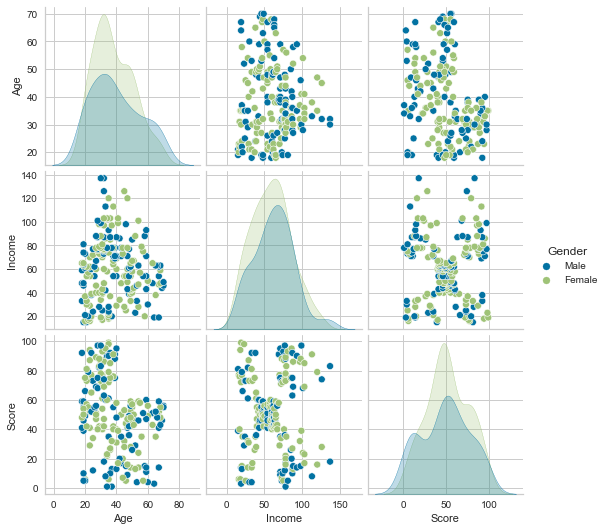

In [161]:
sns.pairplot(df,hue='Gender');

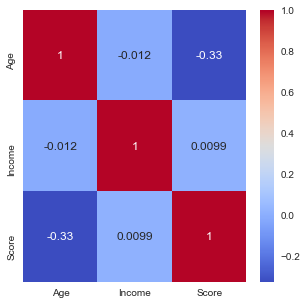

In [162]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

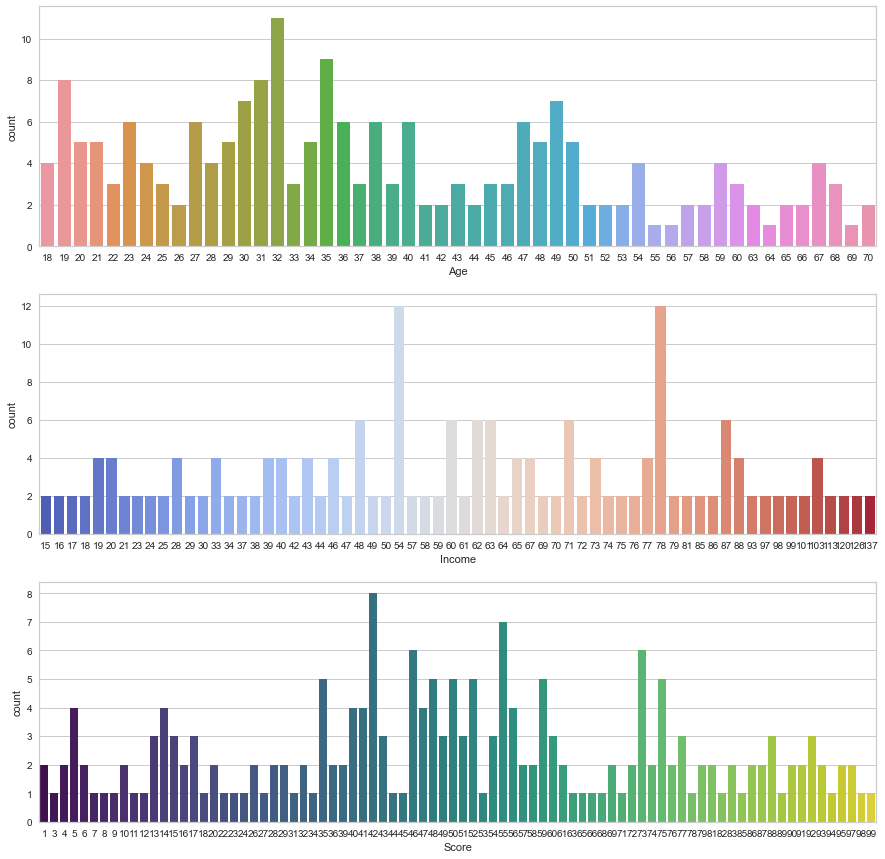

In [163]:
plt.figure(figsize=(15,15))
sns.countplot(x='Income', data=df)

plt.subplot(3,1,1)
sns.countplot(x='Age', data=df)

plt.subplot(3,1,2)
sns.countplot(x='Income', data=df, palette="coolwarm")

plt.subplot(3,1,3)
sns.countplot(x='Score', data=df,palette="viridis")
plt.show()

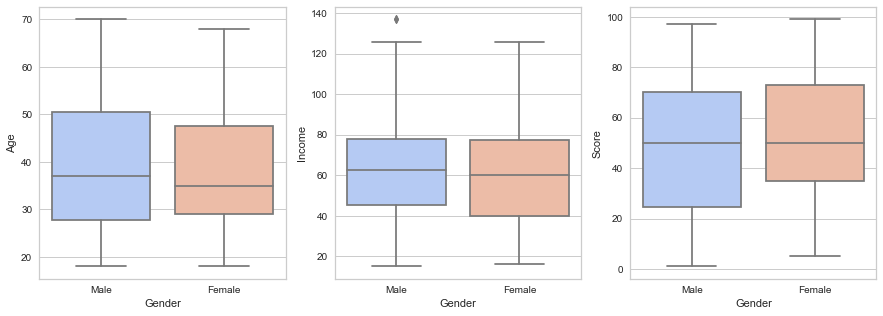

In [164]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='Gender', y='Age', data=df, palette="coolwarm")

plt.subplot(1,3,2)
sns.boxplot(x='Gender', y='Income', data=df, palette="coolwarm")

plt.subplot(1,3,3)
sns.boxplot(x='Gender', y='Score', data=df, palette="coolwarm")
plt.show()

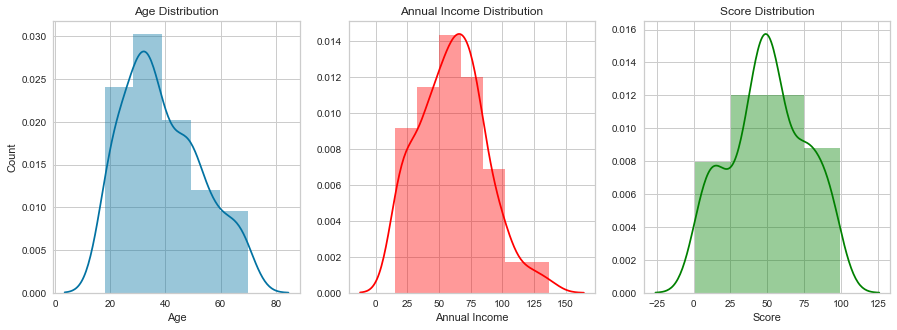

In [165]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(df.Age,bins=5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.distplot(df['Income'],color='red',bins=7)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('')

plt.subplot(1,3,3)
sns.distplot(df['Score'],color='green',bins=4)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('')
plt.show()

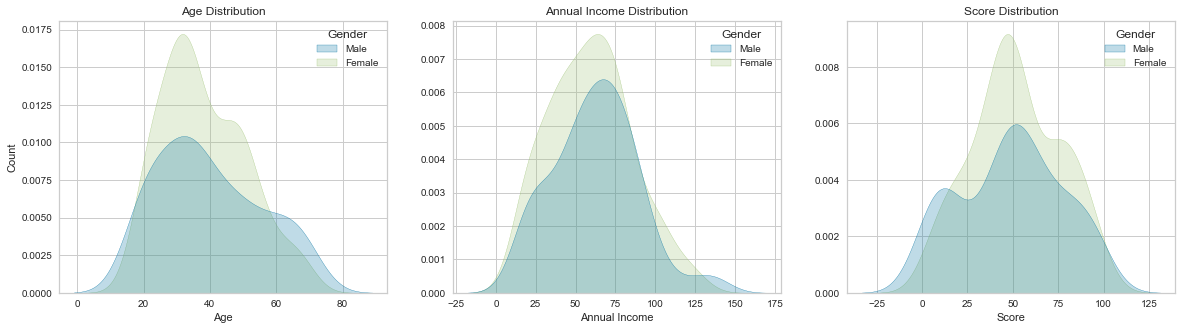

In [166]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.kdeplot(x='Age',data=df,hue="Gender",shade=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.kdeplot(x='Income',data=df,hue="Gender",shade=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('')

plt.subplot(1,3,3)
sns.kdeplot(x='Score',data=df,hue="Gender",shade=True)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('')
plt.show()

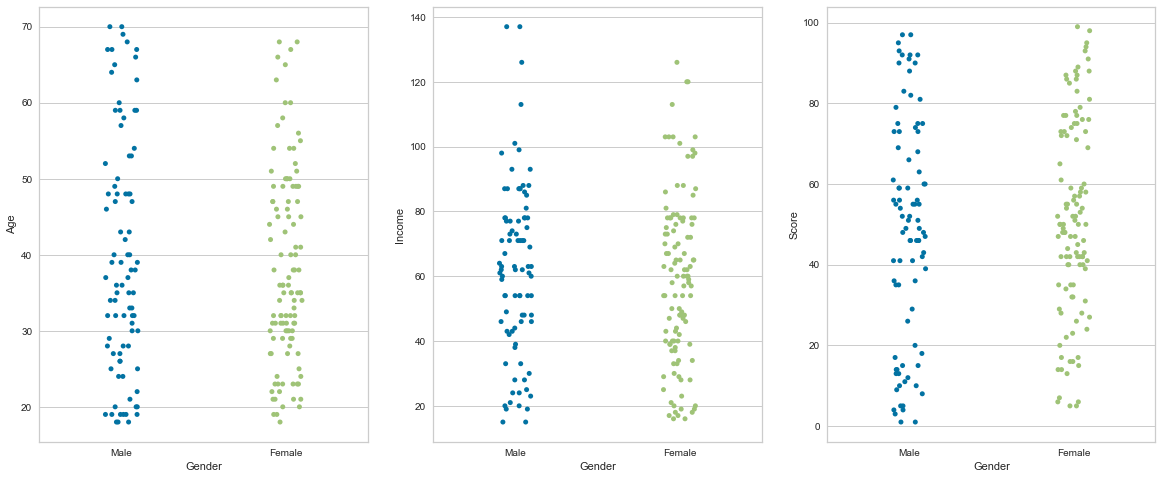

In [167]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.stripplot(df['Gender'], df['Age'])

plt.subplot(1,3,2)
sns.stripplot(df['Gender'], df['Income'])

plt.subplot(1,3,3)
sns.stripplot(df['Gender'], df['Score'])
plt.show()

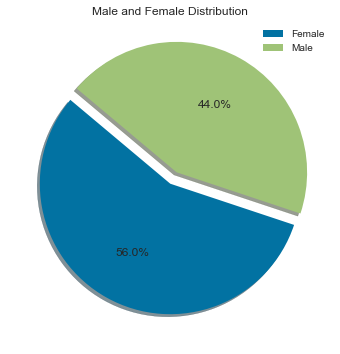

Female    112
Male       88
Name: Gender, dtype: int64

In [168]:
plt.figure(figsize=(6,6))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')
plt.show()

df.Gender.value_counts(dropna=False)

In [169]:
df=pd.get_dummies(df,prefix='',prefix_sep='',drop_first=True)
df.head()

,Age,Income,Score,Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [170]:
df1=df[['Age','Score']]
df1.head(2)

,Age,Score
CustomerID,,
1,19,39
2,21,81


**Hopkins Test**
* Null Hypothesis(Ho) ve Alternative Hypothesis(Ha) temeline dayaniyor.
* Null Hypothesis(Ho): Uniform dagilim var, anlamli kümeleme yok.
* Alternative Hypothesis(Ha):  Veri, ratsgele veri noktalarindan oluşur. Yani Kumeleme vardir.
* [0,1] araliginda bir score verir. score, 0’a yaklaştıkça veri uniform degil,yani clusteringe meyilli
* 1’e yaklaştıkça uniform yapi var, 0.5 gecmedikce kümelenebilir olarak ifade edilir. pratikte 0.3 sinir alinir.

In [171]:
from pyclustertend import hopkins
hopkins(df,df.shape[0])

0.3103246419565819

In [172]:
hopkins(scale(df),df.shape[0])

0.2710851224320408

#### *ii. Determine optimal number of clusters*

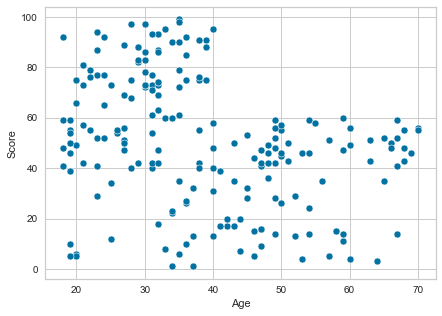

In [173]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age',y='Score',data=df1);

**Lets find k value given the highest Silhouette Score**

**`S(Silhouette) Score`**
* her veri için iki uzaklığı baz alır. Bu uzaklıklardan ilki verinin bulunduğu kümeye ait diğer verilere olan uzaklıkların ortalamasıdır. İkincisi veriye en yakin komsu kümenin tum verilerine olan uzaklıkların ortalamasıdır.
* S değeri ile ifade edilir, s, 1’e yakinsa high clustering, -1e yakinsa low clustering eğilimi gosterir.

In [174]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df1)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4692341232501655
Silhouette Score for 3 clusters: 0.45300127016521263
Silhouette Score for 4 clusters: 0.49973941540141753
Silhouette Score for 5 clusters: 0.44526667994351227
Silhouette Score for 6 clusters: 0.4422780039885027
Silhouette Score for 7 clusters: 0.4212938931368575
Silhouette Score for 8 clusters: 0.43252070356335504
Silhouette Score for 9 clusters: 0.41075686572692066


**k=4 gives the highest S Score**

**`S(Silhouette) Score with scaled data`**

In [175]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(scale(df1))
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(scale(df1), model.labels_)}')

Silhouette Score for 2 clusters: 0.4721271643062346
Silhouette Score for 3 clusters: 0.43952990002101927
Silhouette Score for 4 clusters: 0.4383860846531993
Silhouette Score for 5 clusters: 0.42369111306686563
Silhouette Score for 6 clusters: 0.4566283030197353
Silhouette Score for 7 clusters: 0.40475183754881316
Silhouette Score for 8 clusters: 0.41719912655020425
Silhouette Score for 9 clusters: 0.44311667883166367


> **We got the highest S score with k=4. After scaling, S Score generally decreased. we will continue with unscaled data.**

### > **Elbow Method**

In [176]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df1))
    ssd.append(kmeans.inertia_)

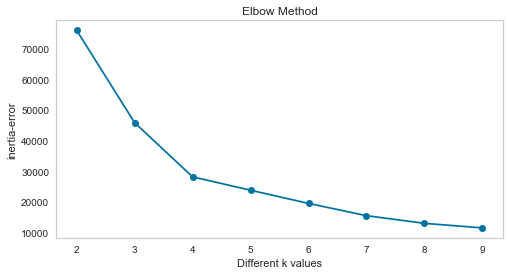

In [177]:
plt.figure(figsize=(8,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

### > **Elbow Method with yellowbrick**

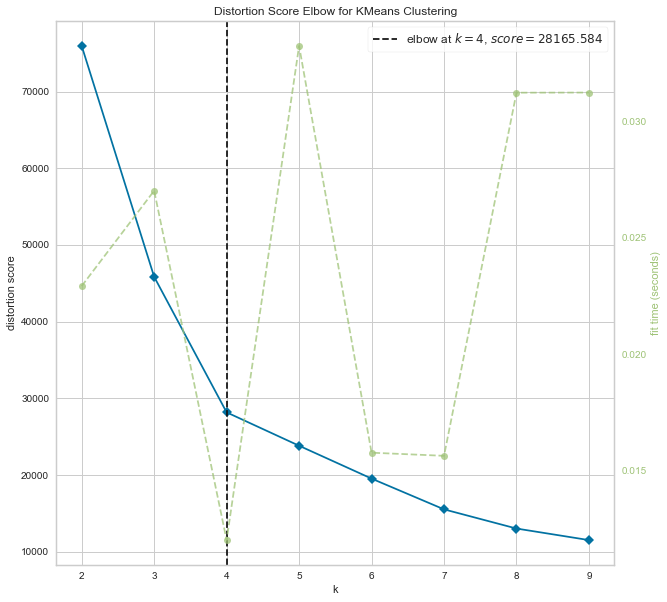

In [178]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df1)
visu.show();

#### *iii. Apply K Means*

In [179]:
kmeans = KMeans(n_clusters = 4).fit(df1)
labels = kmeans.labels_

#### *iv. Visualizing and Labeling All the Clusters*

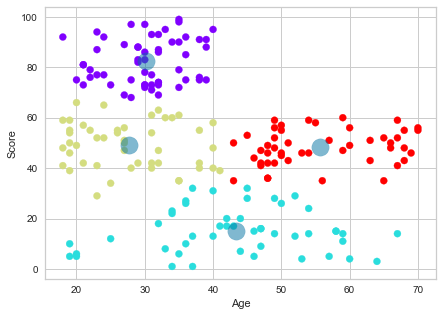

In [180]:
plt.figure(figsize=(7,5))
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300,alpha=0.5, label = 'Centroids')
plt.xlabel(df1.columns[0])
plt.ylabel(df1.columns[1])
plt.show()

In [181]:
df['Age_Score_Clusters']=labels
df.head(5)

,Age,Income,Score,Male,Age_Score_Clusters
CustomerID,,,,,
1,19,15,39,1,2
2,21,15,81,1,0
3,20,16,6,0,1
4,23,16,77,0,0
5,31,17,40,0,2


### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [182]:
df2=df[['Score','Income']]
df2.head(2)

,Score,Income
CustomerID,,
1,39,15
2,81,15


#### *ii. Determine optimal number of clusters*

**Lets find k value given the highest Silhouette Score**

**`S(Silhouette) Score`**
* her veri için iki uzaklığı baz alır. Bu uzaklıklardan ilki verinin bulunduğu kümeye ait diğer verilere olan uzaklıkların ortalamasıdır. İkincisi veriye en yakin komsu kümenin tum verilerine olan uzaklıkların ortalamasıdır.
* S değeri ile ifade edilir, s, 1’e yakinsa high clustering, -1e yakinsa low clustering eğilimi gosterir.

In [183]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df2)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df2, model.labels_)}')

Silhouette Score for 2 clusters: 0.39564531743995546
Silhouette Score for 3 clusters: 0.46761358158775435
Silhouette Score for 4 clusters: 0.4931963109249047
Silhouette Score for 5 clusters: 0.553931997444648
Silhouette Score for 6 clusters: 0.53976103063432
Silhouette Score for 7 clusters: 0.5264283703685728
Silhouette Score for 8 clusters: 0.4563394686110682
Silhouette Score for 9 clusters: 0.4571957283008456


**k=5 gives the highest S Score**

### > **Elbow Method**

In [184]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df2))
    ssd.append(kmeans.inertia_)

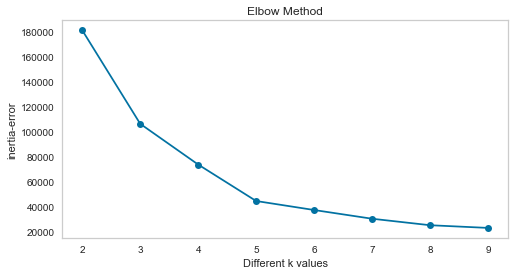

In [185]:
plt.figure(figsize=(8,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

### > **Elbow Method with yellowbrick**

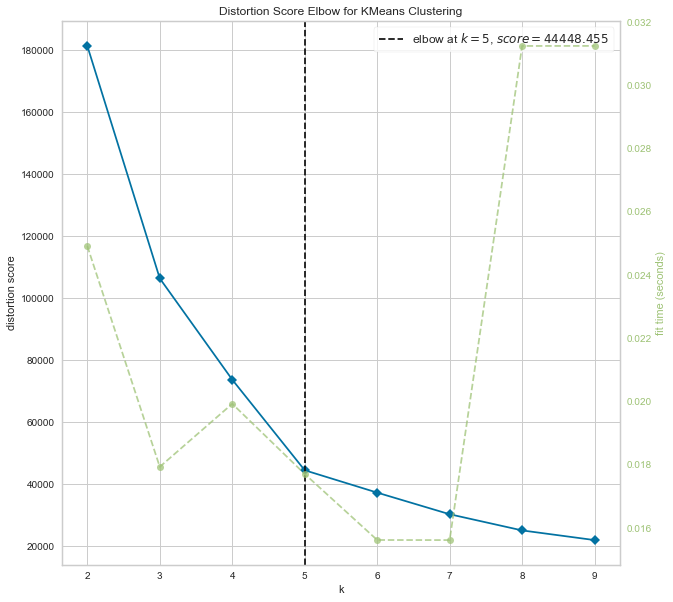

In [186]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df2)
visu.show();

#### *iii. Apply K Means*

In [187]:
kmeans = KMeans(n_clusters = 5).fit(df2)
labels = kmeans.labels_

#### *iv. Visualizing and Labeling All the Clusters*

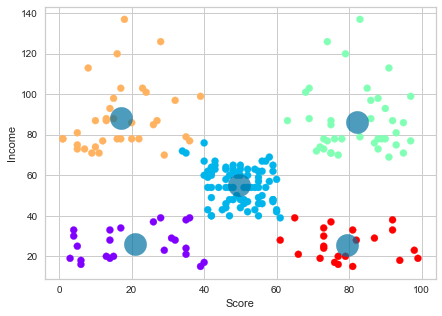

In [188]:
plt.figure(figsize=(7,5))
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500,alpha=0.7, label = 'Centroids')
plt.xlabel(df2.columns[0])
plt.ylabel(df2.columns[1])
plt.show()

In [189]:
df['Score_Income_Clusters']=labels
df.head(5)

,Age,Income,Score,Male,Age_Score_Clusters,Score_Income_Clusters
CustomerID,,,,,,
1,19,15,39,1,2,0
2,21,15,81,1,0,4
3,20,16,6,0,1,0
4,23,16,77,0,0,4
5,31,17,40,0,2,0


### Clustering based on Annual Income and Age

#### *i. Create a new dataset with two variables of your choice*

In [190]:
df3=df[['Age','Income']]
df3.head(2)

,Age,Income
CustomerID,,
1,19,15
2,21,15


In [191]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df3)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df3, model.labels_)}')

Silhouette Score for 2 clusters: 0.42620850066216065
Silhouette Score for 3 clusters: 0.4254725038202792
Silhouette Score for 4 clusters: 0.43295184273333076
Silhouette Score for 5 clusters: 0.40157587536205724
Silhouette Score for 6 clusters: 0.3959805131239844
Silhouette Score for 7 clusters: 0.37835996922531145
Silhouette Score for 8 clusters: 0.3921326517081641
Silhouette Score for 9 clusters: 0.39835932053708534


**k=4 gives the highest S Score**

In [192]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df3))
    ssd.append(kmeans.inertia_)

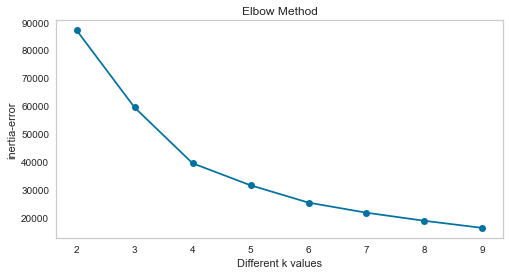

In [193]:
plt.figure(figsize=(8,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

> **Elbow Method with yellowbrick**

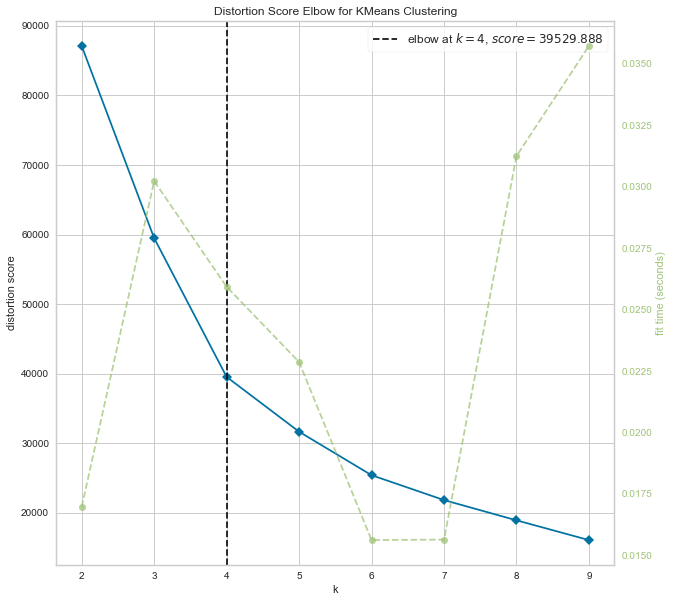

In [194]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df3)
visu.show();

#### *iii. Apply K Means*

In [195]:
kmeans = KMeans(n_clusters = 4).fit(df3)
labels = kmeans.labels_

#### *iv. Visualizing and Labeling All the Clusters*

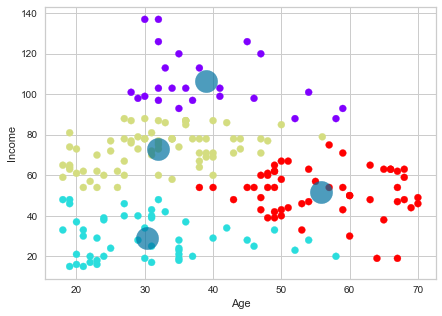

In [196]:
plt.figure(figsize=(7,5))
plt.scatter(df3.iloc[:,0],df2.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500,alpha=0.7, label = 'Centroids')
plt.xlabel(df3.columns[0])
plt.ylabel(df3.columns[1])
plt.show()

In [197]:
df['Age_Income_Clusters']=labels

In [198]:
df.drop(['Age_Score_Clusters','Score_Income_Clusters', 'Age_Income_Clusters'],axis=1,inplace=True)
df_backup=df.copy()

In [199]:
df.drop(['Male'],axis=1,inplace=True)

“k-means algoritması, çeşitli nedenlerden dolayı kategorik verilere doğrudan uygulanamaz. Kategorik veriler için sample ayrıktır ve Öklid mesafesi anlamlı değildir.”

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

**Hierarchy Clustering**

In [200]:
# hc_complete =  linkage(df,"complete")
hc_ward = linkage(df, "ward")
# hc_single = linkage(df, "single")

> **`ward`**

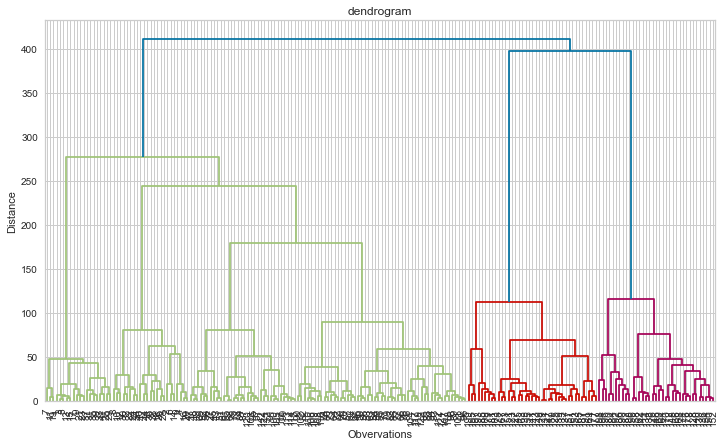

In [201]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

#### ii. *Apply Agglomerative Clustering*

In [202]:
hc = AgglomerativeClustering(n_clusters = 5,affinity='euclidean',linkage='ward') # burada default linkage='ward' dur.
hc.fit_predict(df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [203]:
print(f'Silhouette Score(n=5): {silhouette_score(df, hc.labels_)}')

Silhouette Score(n=5): 0.4401889024290193


In [204]:
df["hc_clusters"] = hc.labels_
df.sample(5)

,Age,Income,Score,hc_clusters
CustomerID,,,,
130,38,71,75,2
153,44,78,20,1
108,54,63,46,0
120,50,67,57,0
113,38,64,42,0


In [205]:
df.groupby('hc_clusters').mean()

,Age,Income,Score
hc_clusters,,,
0,42.156627,54.759036,49.771084
1,41.685714,88.228571,17.285714
2,32.692308,86.538462,82.128205
3,24.850000,24.950000,81.000000
4,45.217391,26.304348,20.913043


**`K-Means`**

In [233]:
kmeans = KMeans(n_clusters = 5).fit(df[['Age', 'Income', 'Score']])
kmeans.fit_predict(df[['Age', 'Income', 'Score']])
labels = kmeans.labels_
df["kmeans_clusters"] = labels

In [234]:
df.groupby('kmeans_clusters').mean()

,Age,Income,Score,hc_clusters
kmeans_clusters,,,,
0,32.692308,86.538462,82.128205,2.000000
1,43.126582,54.822785,49.835443,0.012658
2,40.324324,87.432432,18.189189,0.918919
3,25.272727,25.727273,79.363636,2.727273
4,45.217391,26.304348,20.913043,4.000000


 **K_Means vs HC**

In [235]:
pd.crosstab(df.kmeans_clusters,df.hc_clusters)

hc_clusters,0,1,2,3,4
kmeans_clusters,,,,,
0,0,0,39,0,0
1,78,1,0,0,0
2,3,34,0,0,0
3,2,0,0,20,0
4,0,0,0,0,23


#### iii. *Visualizing and Labeling All the Clusters* 

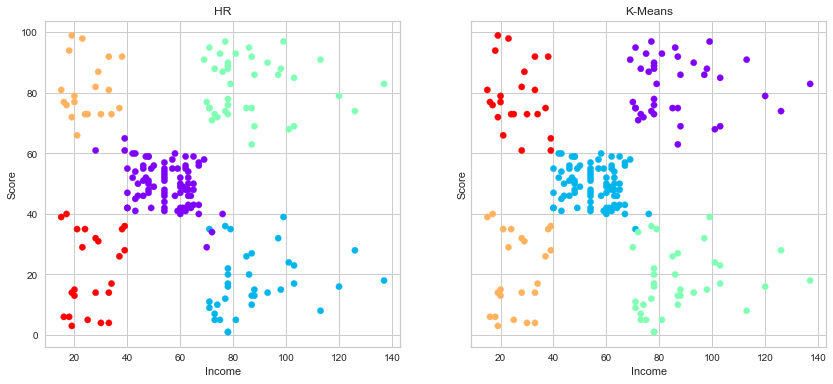

In [209]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6)) # sharey=True ile y eksen labels lari ortak kullanirlar.
ax1.set_title('HR')
ax1.set_xlabel('Income')
ax1.set_ylabel('Score')
ax1.scatter(df.iloc[:,1], df.iloc[:,2], c = df.hc_clusters, s = 40, cmap = "rainbow") # s=40 ,dot size
ax2.set_title("K-Means")
ax2.set_xlabel('Income')
ax2.set_ylabel('Score')
ax2.scatter(df.iloc[:,1], df.iloc[:,2], c = df.kmeans_clusters, s = 40, cmap = "rainbow");

In [232]:
# HC Clustering
silhouette_score(df.drop(['kmeans_clusters','hc_clusters'],axis=1), hc.fit_predict(df))

0.4401889024290193

In [237]:
# K-Means Clustering
silhouette_score(df.drop(['kmeans_clusters','hc_clusters'],axis=1), kmeans.fit_predict(df))

0.44504314844253573

> **We can say K-means Clustering Model is more succesful. Its S Score is higher than HC**

**Visualization of Clusters in 3D**

In [210]:
from mpl_toolkits.mplot3d import Axes3D

kmeans= KMeans(n_clusters=5).fit(df)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

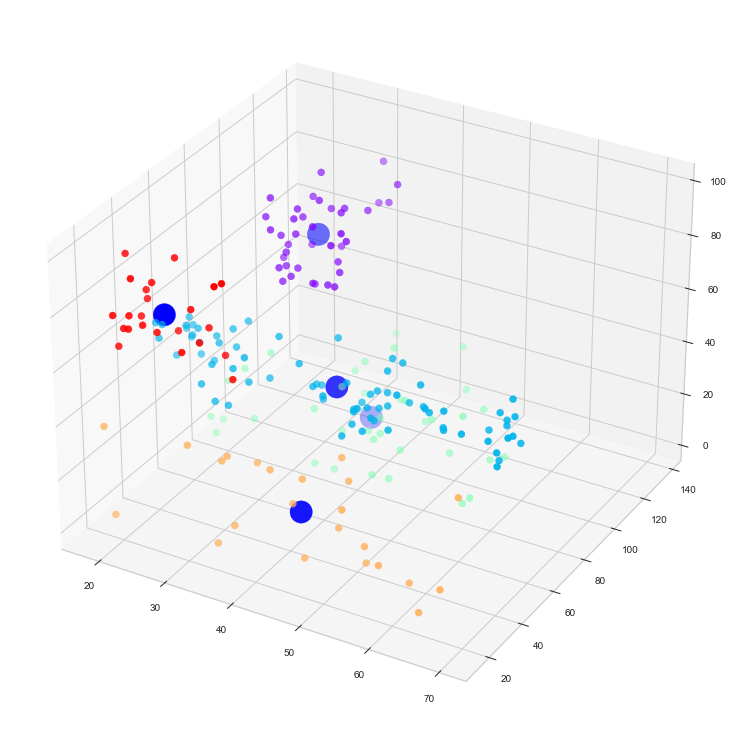

In [211]:
plt.rcParams["figure.figsize"] =(10,10)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c = clusters, s = 50,cmap = "rainbow")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="blue",marker="o",s = 500);

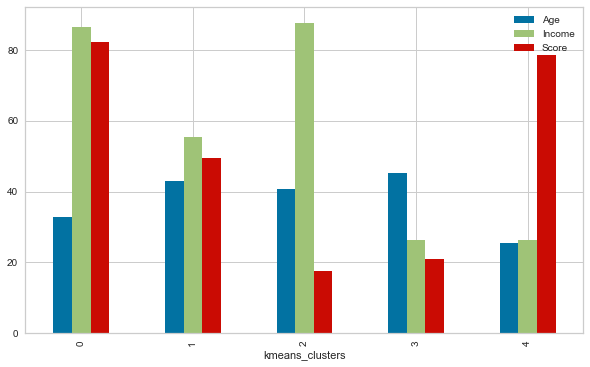

In [212]:
df.drop(['kmeans_clusters','hc_clusters'],axis=1).groupby(df.kmeans_clusters).mean().plot(figsize = (10,6), kind='bar')
plt.show()

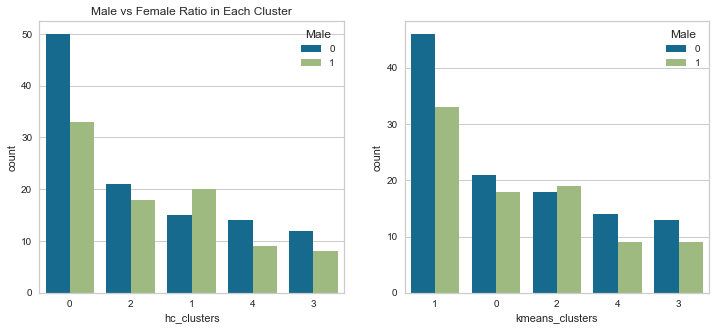

In [240]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='hc_clusters', data=df.merge(df_backup), hue='Male',order = df['hc_clusters'].value_counts().index)
plt.title("Male vs Female Ratio in Each Cluster")

plt.subplot(1,2,2)
sns.countplot(x='kmeans_clusters', data=df.merge(df_backup), hue='Male', order = df['kmeans_clusters'].value_counts().index)
plt.show()

### Conclusion

**1st group(Orange):** Low income, low spending score
* Kisiye ozel cazip indirim kampanyalari yapilabilir.

**2nd group(Green):** High income, low spending score
* Aylik belli harcama hedefine ulasanlara hediye ceki verilebilir.

**3rd group(Blue):** Moderate income, moderate spending score
* Her alisveris icin cekilise katima sansi verilebilir.

**4th group(Red):** Low income, high spending score
* Sadik musteri yapmak icin uyelik karti verilebilir.

**5th group(Purple):** High income, high spending score
* Sadik musteri yapmak icin uyelik karti verilebilir.
